# DeepLabcut

In [ ]:
# El proyecto se crea usando la GUI del DLC, este mismo lo subi al drive. Con el siguiente codigo "subo" mi drive al colab
# # La creacion del proyecto y marcar (labels) las imagenes lo realize en mi computadora, en el colab solo se entrena , se analiza y se refina el algoritmo

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### cargamos y preparamos los datos



In [ ]:
!pip install "deeplabcut[tf]"

Asegurate de clickear **"RESTART RUNTIME"** si lo muestra antes de seguir!

In [ ]:
# Importamos el DLC y
import deeplabcut

In [ ]:
# Creo una variable con el path de la config.yaml
path_config_file = '/content/drive/MyDrive/...../config.yaml'

In [ ]:
deeplabcut.create_training_dataset(path_config_file) #creo el training dataset (es decir que imagenes van al train y cuales al test)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([18,  1, 19,  8, 10, 17,  6, 13,  4,  2,  5, 14,  9,  7, 16, 11,  3,
           0, 15]),
   array([12])))]

### Entrenamiento

In [ ]:
# Comenzamos a entrenar ! ==> segun el protocolo podemos tendiramos que entrenar en el orden de las 100K iteraciones o mas
deeplabcut.train_network(path_config_file, shuffle=1, displayiters=1000,saveiters=15000)

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['head', 'body', 'tail'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_sabriNov8/sabri_sabri95shuffle1.mat',
 'dataset_type': 'default',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': T

Selecting single-animal trainer
Batch Size is 1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 5000
Save_iters overwritten as 15000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/dlc-models/iteration-0/sabriNov8-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2]], 'all_jo

iteration: 5000 loss: 0.0091 lr: 0.005
iteration: 10000 loss: 0.0043 lr: 0.005
iteration: 15000 loss: 0.0044 lr: 0.02
iteration: 20000 loss: 0.0034 lr: 0.02
iteration: 25000 loss: 0.0031 lr: 0.02


KeyboardInterrupt: ignored

In [ ]:
deeplabcut.evaluate_network(path_config_file,Shuffles=[1], plotting=True) # para evaluar

### Analisis
Ahora nos queda analizar todo el video completo, es decir, pasarselo a la red para que nos de las etiquetas en todos los frames que no etiquetamos  

In [ ]:
path_config_file =  '/content/drive/MyDrive/.../config.yaml'
videofile_path =  ['/content/drive/MyDrive/.../0.avi']

In [ ]:
# Analizamos la lista anterior
# el archivo .h5 es el que tiene las poses, se puede pasar a csv para leerlo mas facil
deeplabcut.analyze_videos(path_config_file,videofile_path,save_as_csv=True, auto_track = True)

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['head', 'body', 'tail'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_sabriNov8/sabri_sabri95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 3,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffle': True,
 'snapshot_prefix': '/content/drive/MyDrive/CAJAL '
      

Using snapshot-15000 for model /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/dlc-models/iteration-0/sabriNov8-trainset95shuffle1
Starting to analyze %  /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos/0.avi
Loading  /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos/0.avi
Duration of video [s]:  16.67 , recorded with  60.0 fps!
Overall # of frames:  1000  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 1000/1000 [00:25<00:00, 38.89it/s]


Saving results in /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_sabriNov8shuffle1_15000'

Podemos exportar el modelo para poder usarlo mas tarde o en DLC-live https://deeplabcut.github.io/DeepLabCut/docs/HelperFunctions.html?highlight=export%20model


In [ ]:

#deeplabcut.export_model(cfg_path, iteration=None, shuffle=1, trainingsetindex=0, snapshotindex=None, TFGPUinference=True, overwrite=False, make_tar=True)
#deeplabcut.export_model(path_config_file)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
# podemos graficar las trayectorias
deeplabcut.plot_trajectories(path_config_file,videofile_path)

Loading  /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos/0.avi and data.
Plots created! Please check the directory "plot-poses" within the video directory


In [ ]:
# Para poder visualizar el resultado podemos armar videos nuevos con los labels marcados (en este caso tambien agregue el esqueleto)

deeplabcut.create_labeled_video(path_config_file,videofile_path, draw_skeleton = True, save_frames=True)

Starting to process video: /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos/0.avi
Loading /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos/0.avi and data.
Duration of video [s]: 16.67, recorded with 60.0 fps!
Overall # of frames: 1000 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 1000/1000 [04:11<00:00,  3.97it/s]


Labeled video /content/drive/MyDrive/CAJAL DLC/sabri-sabri-2023-11-08/videos/0DLC_resnet50_sabriNov8shuffle1_15000_labeled.mp4 successfully created.


[True]

## Refinamos nuestro modelo

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path)

In [ ]:
#deeplabcut.refine_labels(path_config_file) # este paso no se puede hacr en colab!


In [ ]:
deeplabcut.merge_datasets(path_config_file) #No se olviden de hacer esta parte!

## Si trabajamos con MultiAnimal:
Cambian algunos comandos:

In [ ]:
deeplabcut.convert_detections2tracklets(path_config_file,videofile_path, identity_only=True, overwrite = True)
deeplabcut.stitch_tracklets(path_config_file,videofile_path)
deeplabcut.plot_trajectories(path_config_file,videofile_path)

# DLC 2 KINEMATICS

In [ ]:
!pip install dlc2kinematics

In [ ]:
import dlc2kinematics #correr dos veces si se cierra la sesion

In [ ]:

path = '/content/drive/MyDrive/..../nombrearchivo.h5'
df, bodyparts, scorer = dlc2kinematics.load_data(path)

df_vel = dlc2kinematics.compute_velocity(df,bodyparts=['all']) #para todos los bodyparts
#df_vel_head = dlc2kinematics.compute_velocity(df,bodyparts=['head']) #para el bodyparts que llame head

dlc2kinematics.smooth_trajectory(df,bodyparts=['head'] ) #para smoothear la trayectoria

In [ ]:
df[scorer]['head'][df[scorer]['head']['likelihood' ]> 0.7]

coords,x,y,likelihood
3,387.694794,326.562653,0.999278
9,403.004578,309.588593,0.999416
10,403.877319,305.830780,0.999821
11,403.867828,304.242737,0.999687
12,403.054840,299.908356,0.999369
...,...,...,...
938,277.052551,190.932404,0.999848
939,279.199951,193.136353,0.999876
940,280.633301,195.978409,0.999807
941,282.682831,198.040192,0.999688


In [ ]:
bodyparts

['head', 'body', 'tail']

In [1]:
#datos_head_smooth = dlc2kinematics.smooth_trajectory(df,bodyparts=['head'],filter_window=3000, order=1000 )[scorer]['head']



In [ ]:
dlc2kinematics.smooth_trajectory?

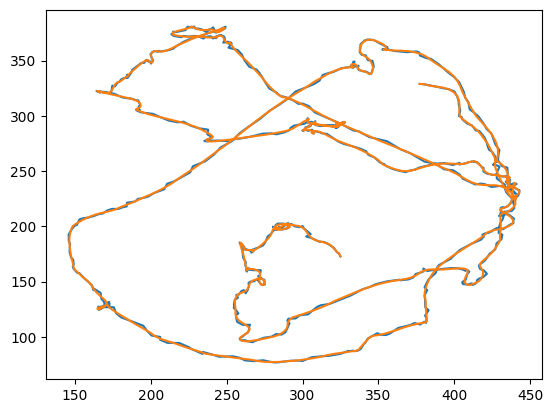

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(df[scorer][bodyparts[0]]['x']),list(df[scorer][bodyparts[0]]['y']))
plt.plot(list(datos_head_smooth['x']),list(datos_head_smooth['y']))
#agregar las flechitas para la direc de mov

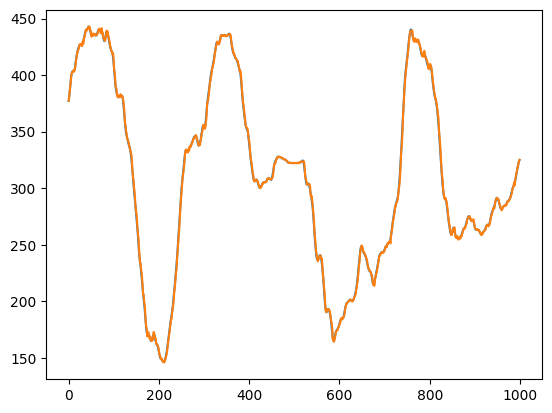

In [ ]:
plt.plot(list(datos_head_smooth['x']))
plt.plot(list(df[scorer][bodyparts[0]]['x']))

In [ ]:
# pasar a distancia
xp = list(df[scorer][bodyparts[0]]['x'])
dist_en_pixeles = max(xp) - min(xp)



252.80039978027344

In [ ]:
df_sin_scorer = df[scorer]
df_sin_scorer

bodyparts        head                               body              \
coords              x           y likelihood           x           y   
0          286.691711  220.722153   0.999998  272.326660  224.238281   
1          293.295746  218.484039   1.000000  276.797760  221.913116   
2          296.572662  218.509094   0.999997  283.596832  221.437576   
3          303.764130  218.399231   0.999999  288.510284  221.495453   
4          311.248718  218.659851   0.999999  295.750275  220.359375   
...               ...         ...        ...         ...         ...   
8812       444.406616  329.003815   0.999999  447.159363  339.204224   
8813       444.859863  327.991821   0.999999  447.833710  339.530975   
8814       446.315796  328.531464   0.999999  448.692596  340.530884   
8815       449.556976  327.746246   1.000000  449.262024  339.664673   
8816       455.141418  326.593262   1.000000  449.660431  339.218933   

bodyparts                   tail                         
coords    likelihood           x           y likelihood  
0           1.000000  259.114716  228.677460   1.000000  
1           1.000000  260.952942  223.955994   0.999998  
2           0.999996  266.607025  227.071075   0.999999  
3           1.000000  274.492126  228.064560   1.000000  
4           0.999999  279.069946  223.771667   0.999999  
...              ...         ...         ...        ...  
8812        1.000000  452.866150  348.204346   1.000000  
8813        1.000000  454.222656  349.655579   1.000000  
8814        1.000000  455.434052  351.375854   1.000000  
8815        1.000000  455.344360  351.664001   1.000000  
8816        0.999998  455.219116  351.336731   0.999999  

[8817 rows x 9 columns]

In [ ]:
#import numpy as np

#vel_mod = np.sqrt(df_vel_head[scorer][bodyparts[0]]['x']**2 + df_vel_head[scorer][bodyparts[0]]['y']**2)

#plt.plot(vel_mod)

# kinematics multiAnimal

In [ ]:
!pip install dlc2kinematics

In [ ]:
import dlc2kinematics #correrlo dos veces

In [ ]:
path = 'Trial1DLC_dlcrnetms5_pruebadia2Nov7shuffle1_60000_el.h5'
df, bodyparts, scorer = dlc2kinematics.load_data(path)
ind = 'individual1'
cabeza = 'cabeza' #bodyparts[0]
df

scorer      DLC_dlcrnetms5_pruebadia2Nov7shuffle1_60000                      \
individuals                                 individual1                       
bodyparts                                        cabeza                       
coords                                                x        y likelihood   
0                                               335.039  245.983        1.0   
1                                               334.986  244.789        1.0   
2                                               337.437  249.817        1.0   
3                                               339.827  247.132        1.0   
4                                               341.499  243.207        1.0   
...                                                 ...      ...        ...   
7503                                            343.581  212.227        1.0   
7504                                            343.722  210.757        1.0   
7505                                            344.223  209.107        1.0   
7506                                            342.903  209.326        1.0   
7507                                            343.044  208.588        1.0   

scorer                                                                 \
individuals                                                             
bodyparts     cuerpo                         cola                       
coords             x        y likelihood        x        y likelihood   
0            332.591  260.599        1.0  325.976  287.494        1.0   
1            333.074  259.028        1.0  328.073  285.412        1.0   
2            334.411  266.493        1.0  331.325  283.762        1.0   
3            333.634  264.297        1.0  332.260  280.059        1.0   
4            334.137  260.984        1.0  332.547  277.814        1.0   
...              ...      ...        ...      ...      ...        ...   
7503         344.209  228.295        1.0  354.556  237.661        1.0   
7504         344.735  227.710        1.0  355.021  237.506        1.0   
7505         345.011  226.371        1.0  354.635  237.014        1.0   
7506         345.677  225.220        1.0  354.705  236.430        1.0   
7507         348.410  223.642        1.0  354.406  235.785        1.0   

scorer                                                                    \
individuals individual2                                                    
bodyparts        cabeza                       cuerpo                       
coords                x        y likelihood        x        y likelihood   
0               417.033  151.668        1.0  435.204  150.149        1.0   
1               413.962  152.384        1.0  433.529  149.392        1.0   
2               411.090  152.120        1.0  430.165  148.806        1.0   
3               409.068  151.842        1.0  428.250  148.145        1.0   
4               406.960  150.799        1.0  428.047  154.413        1.0   
...                 ...      ...        ...      ...      ...        ...   
7503            561.583  128.400        1.0  550.547  133.943        1.0   
7504            562.216  126.569        1.0  550.654  134.546        1.0   
7505            562.499  128.575        1.0  550.787  134.417        1.0   
7506            562.749  126.549        1.0  551.014  134.473        1.0   
7507            562.820  128.434        1.0  550.960  134.387        1.0   

scorer                                    
individuals                               
bodyparts       cola                      
coords             x        y likelihood  
0            444.700  161.154        1.0  
1            443.849  160.492        1.0  
2            445.135  158.916        1.0  
3            444.027  159.264        1.0  
4            442.600  158.613        1.0  
...              ...      ...        ...  
7503         541.549  147.147        1.0  
7504         541.474  147.396        1.0  
7505         541.407  147.310        1.0  
7506         541.1

In [ ]:
df[scorer][ind][cabeza]